In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/garbage-classification/garbage_classification/metal/metal375.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal561.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal341.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal688.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal374.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal427.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal383.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal692.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal560.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal702.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal215.jpg
/kaggle/input/garbage-classification/garbage_classification/metal/metal113.jpg
/kaggle/input/garbage-classification/garbage_classif

# import thư viện

In [2]:
import os
import shutil
import random

# Visualize

{'metal': 769, 'white-glass': 775, 'biological': 985, 'paper': 1050, 'brown-glass': 607, 'battery': 945, 'trash': 697, 'cardboard': 891, 'shoes': 1977, 'clothes': 5325, 'plastic': 865, 'green-glass': 629}


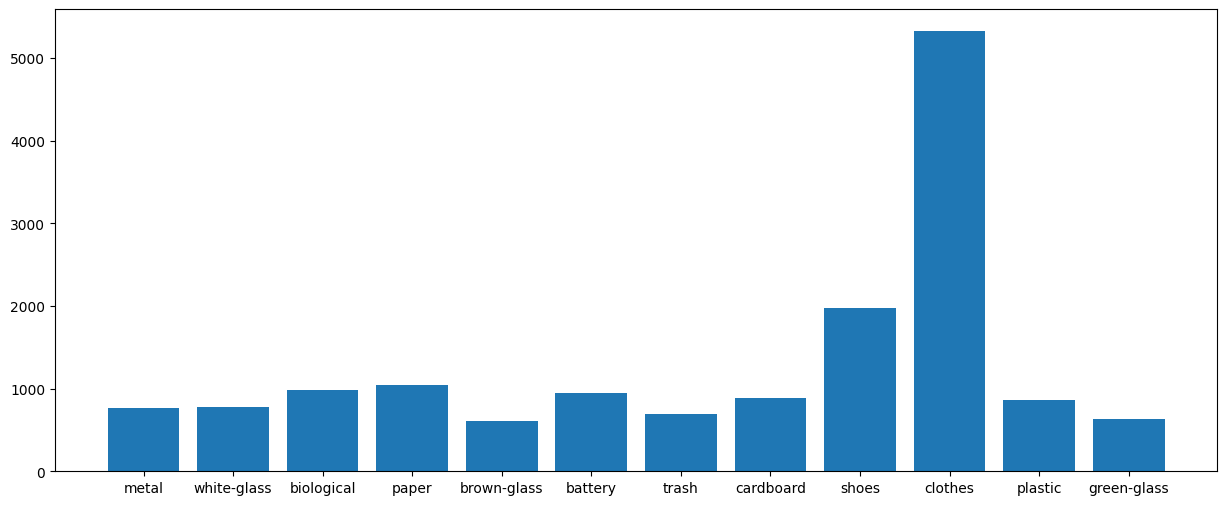

In [3]:
# from google.colab import drive
# drive.mount ('/content/drive')

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("joebeachcapital/realwaste")

# print("Path to dataset files:", path)

# #chuyển dataset vừa lưu vào trong thư mục dataset của drive
# !cp -r /root/.cache/kagglehub/datasets/joebeachcapital/realwaste/versions/1 /content/drive/MyDrive/DoAn/dataset



source="/kaggle/input/garbage-classification/garbage_classification"

#Liệt kê các thư mục trong src lưu thành lable
import os
lables=os.listdir(source)

lables

#Đếm số lượng ảnh trong các thư mục
dataset_count = {}
for label in lables:
    label_path = os.path.join(source, label)
    count = len(os.listdir(label_path))
    dataset_count[label] = count

print(dataset_count)

#visualize số lượng nhãn
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
labels = list(dataset_count.keys())
lable_count = list(dataset_count.values())
plt.bar(labels, lable_count)
plt.show()





# Tạo train test và chia dữ liệu

In [4]:


# # Đường dẫn dataset gốc
# DATASET_PATH = "/kaggle/input/garbage-classification/garbage_classification" #đường dẫn thư mục dữ liệu gốc
# OUTPUT_PATH = "/kaggle/working/dataset_split"  #đường dẫn dataset sau khi chia train test
# TRAIN_SPLIT = 0.8  # Tỷ lệ tập train

# # Tạo các thư mục train và test
# train_dir = os.path.join(OUTPUT_PATH, "train")
# test_dir = os.path.join(OUTPUT_PATH, "test")
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Duyệt qua các nhãn (thư mục con)
# for label in os.listdir(DATASET_PATH): #kết quả là glass, metal,...
#     label_path = os.path.join(DATASET_PATH, label) # tạo đường dẫn đến thư mục con kết quả là /content/drive/MyDrive/DoAn/dataset/1/realwaste-main/RealWaste/Glass
#     if os.path.isdir(label_path): #kiểm tra thư mục có tồn tại k?
#         # Tạo thư mục nhãn trong train và test
#         os.makedirs(os.path.join(train_dir, label), exist_ok=True)#/content/drive/MyDrive/DoAn/dataset_split/train/Cardboard
#         os.makedirs(os.path.join(test_dir, label), exist_ok=True)

#         # Lấy danh sách tất cả ảnh
#         images = os.listdir(label_path) #danh sách đường dẫn các ảnh trong dataset gốc/content/drive/MyDrive/DoAn/dataset/1/realwaste-main/RealWaste/Cardboard/Cardboard_1.jpg
#         random.shuffle(images)  # trộn lên

#         # Chia dữ liệu
#         split_idx = int(len(images) * TRAIN_SPLIT)
#         train_images = images[:split_idx]
#         test_images = images[split_idx:]

#         # Copy ảnh vào thư mục tương ứng
#         for img in train_images:
#             shutil.copy(os.path.join(label_path, img), os.path.join(train_dir, label, img))
#         for img in test_images:
#             shutil.copy(os.path.join(label_path, img), os.path.join(test_dir, label, img))

# print("Dữ liệu đã được chia ngẫu nhiên vào thư mục train và test.")

# Chuẩn bị dữ liệu

Found 15429 files belonging to 12 classes.
Found 5570 files belonging to 12 classes.
Tập train và test đã được load.


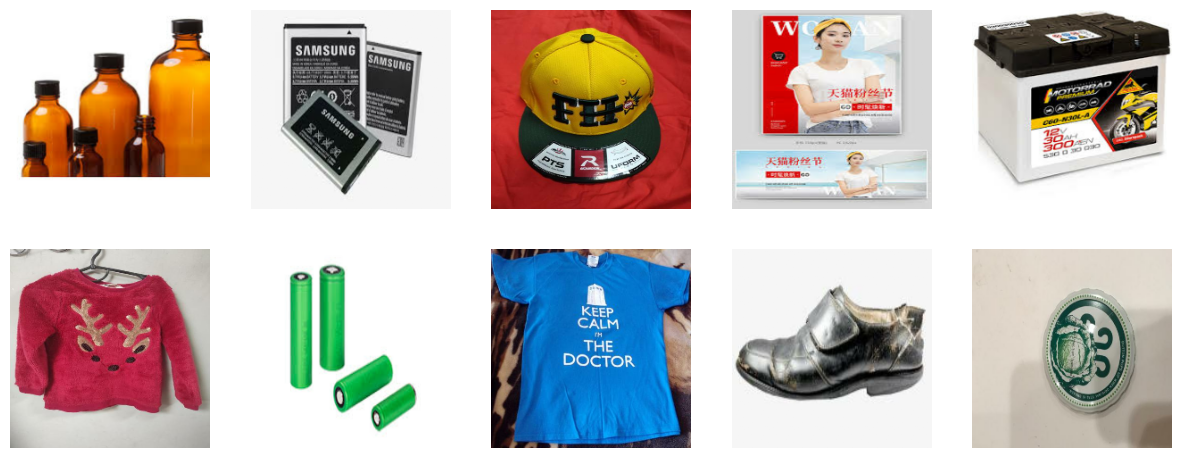

In [5]:

OUTPUT_PATH = "/kaggle/input/dataset-split/data_split" 

###################################
import tensorflow as tf
import os
# Đường dẫn tới các thư mục train và test
train_path = "/kaggle/input/dataset-split/data_split/train"
test_path = "/kaggle/input/dataset-split/data_split/test"

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32 # chia thành các lô cho qtrinh huấn luyện với mỗi lô chứa 32 ảnh (8,16,32,64)

# Load tập train
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Load tập test
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Lấy danh sách nhãn từ dataset
class_names = train_dataset.class_names

# Chuẩn hóa dữ liệu
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    # mỗi ô màu có gtri px từ 0-255 chia 255 để về khoảng 0-1, số nhỏ ít tiêu tốn tài nguyên và time
    return image, label

train_dataset = train_dataset.map(preprocess)#áp dụng cho all data bên trong
test_dataset = test_dataset.map(preprocess)

# Tối ưu hóa hiệu suất tự động chia data trong quá trình train
AUTOTUNE = tf.data.AUTOTUNE #không làm tràn bộ nhớ but qtrinh chuẩn bị dữ liệu chậm
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("Tập train và test đã được load.")

# Trực quan hóa ngẫu nhiên 10 hình kèm dữ liệu trong tập train
# Trực quan hóa ngẫu nhiên 10 hình kèm dữ liệu trong tập train
import matplotlib.pyplot as plt
for images, labels in train_dataset.take(1):  # Shuffle lại để hiển thị ngẫu nhiên
    plt.figure(figsize=(15, 15))
    for i in range(min(10, len(images))):  # Đảm bảo không vượt quá số lượng ảnh
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())
        #plt.title(class_names[labels[i].numpy()])  # Sử dụng class_names từ TensorFlow
        plt.axis("off")
    plt.show()



from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

# Lớp Dense: lớp tuyến tính (y=ax+b)


# Lớp Conv2D: lớp tích chập sử dụng cho data dạng ma trận (trích xuất các đặc trưng dđ của ảnh thông qua việc use bộ lọc để qsat dc nhiều ảnh hơn. Sử dụng nhiều bộ lọc (muốn nhiêu cũng được)


# kernel: cửa sổ trượt, bộ lọc

# Pooling: tổng hợp gtri, giảm kích thước dữ liệu nhưng không làm mất mát quá nhiều dữ liệu, giữ lại được đặc trưng chính


# Flatten: trải phẳng dữ liệu biến dữ liệu thành vecto 1 chiều

# Dropout: tắt ngẫu nhiên 1 số lượng neural từ đó giảm được tình trạng overfitting






# Khởi tạo TPU

In [6]:
import tensorflow as tf

# Khởi tạo TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("TPU initialized successfully!")
except ValueError:
    print("TPU not found, using CPU/GPU instead.")
    strategy = tf.distribute.get_strategy()

TPU not found, using CPU/GPU instead.


# Kiểm tra số GPU

In [7]:
import tensorflow as tf

# Kiểm tra số GPU
gpus = tf.config.list_physical_devices('GPU')
print(f"Available GPUs: {len(gpus)}")
if len(gpus) < 2:
    print("Need at least 2 GPUs for this setup!")


Available GPUs: 2


In [8]:
strategy = tf.distribute.MirroredStrategy()

# base_model

In [9]:

# Định nghĩa mô hình
with strategy.scope():
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(256, activation='relu'), 
        Dense(128, activation='relu'),  
        Dense(64, activation='relu'),   
        Dense(len(class_names), activation='softmax')  
    ])
    
    # Compile mô hình
    # adam: tự điều chỉnh tốc độ học, đỡ tốn tài nguyên
    #
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
checkpoint_dir = "/kaggle/working/modes"
os.makedirs(checkpoint_dir)

In [11]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/base_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/base_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Checkpoint lưu mô hình qua từng epoch
checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
    filepath="{checkpoint_dir}/base_model_epoch_{epoch:02d}.keras",
    save_freq="epoch",
    verbose=1
)

In [12]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [13]:

# Huấn luyện mô hình
import time
start_time = time.time()
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset, callbacks=[checkpoint_high_acc, checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện:", end_time - start_time, "giây")


Epoch 1/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3917 - loss: 2.0239
Epoch 1: val_accuracy improved from -inf to 0.55153, saving model to /kaggle/working/modes/base_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 1.43761, saving model to /kaggle/working/modes/base_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 68s 123ms/step - accuracy: 0.3919 - loss: 2.0231 - val_accuracy: 0.5515 - val_loss: 1.4376
Epoch 2/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5893 - loss: 1.2075
Epoch 2: val_accuracy improved from 0.55153 to 0.59246, saving model to /kaggle/working/modes/base_model_highest_accuracy.keras

Epoch 2: val_loss improved from 1.43761 to 1.22276, saving model to /kaggle/working/modes/base_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 56s 115ms/step - accuracy: 0.5893 - loss: 1.2074 - val_accuracy: 0.5925 - val_loss: 1.2228
Epoch 3/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6839 - loss: 0.9480
Epoch 3: v

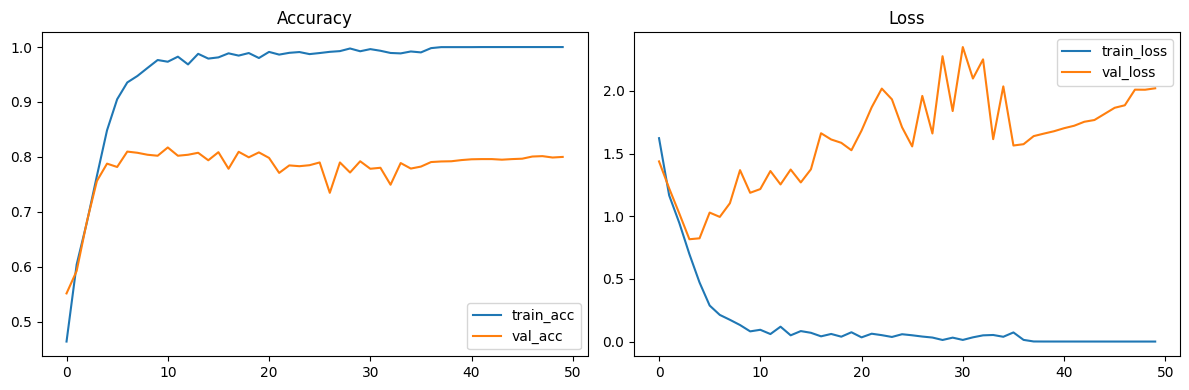

In [14]:

#Vẽ biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc, label="train_acc")
axs[0].plot(val_acc, label="val_acc")
axs[0].set_title("Accuracy")
axs[0].legend()
axs[1].plot(train_loss, label="train_loss")
axs[1].plot(val_loss, label="val_loss")
axs[1].set_title("Loss")
axs[1].legend()

plt.tight_layout()
plt.show()
#bỏ qua


In [15]:
# from tensorflow.keras.models import load_model
# model_high_accuracy = load_model("/kaggle/input/weight-cnn301/modes/base_model_highest_accuracy.keras")
# model_low_loss = load_model("/kaggle/input/weight-cnn301/modes/base_model_lowest_loss.keras")

In [16]:

# # Đánh giá mô hình
# eval = model_high_accuracy.evaluate(test_dataset)
# print(eval)

In [17]:
# # Đánh giá mô hình
# eval = model_low_loss.evaluate(test_dataset)
# print(eval)

In [18]:
# from tensorflow.keras.models import load_model
# model_high_accuracy = load_model("/kaggle/working/modes/base_model_highest_accuracy.keras")
# model_low_loss = load_model("/kaggle/working/modes/base_model_lowest_loss.keras")

In [19]:
eval = model.evaluate(test_dataset) 
print(eval)


175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7864 - loss: 2.0574
[2.0210249423980713, 0.800000011920929]


# Model Resnet

In [20]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/resnet_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/resnet_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Checkpoint lưu mô hình qua từng epoch
checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
    filepath="{checkpoint_dir}/resnet_model_epoch_{epoch:02d}.keras",
    save_freq="epoch",
    verbose=1
)

In [21]:

# # Khởi tạo mô hình transfer learning với resnet 50
# from tensorflow.keras.applications import ResNet50V2

# # Đường dẫn đến tệp mô hình
# weights_path = '/kaggle/input/resnet50v2-trained-weights/resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5'
# # Tải mô hình ResNet50V2 đã được huấn luyện trước (bỏ phần fully connected layer cuối cùng)
# base_model = ResNet50V2(weights=weights_path, include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
from tensorflow.keras.applications import ResNet50V2
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Đóng băng các layer của base model để không bị huấn luyện lại
for layer in base_model.layers:
    layer.trainable = False

# định nghĩa adam với learning rate = 0.0001
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)


model_resnet = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'), 
    Dropout(0.3), 
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),  
    Dropout(0.2),                 
    Dense(len(class_names), activation='softmax')
])

# Compile mô hình
model_resnet.compile(optimizer= optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:

# Huấn luyện mô hình
import time
start_time = time.time()
history = model_resnet.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[checkpoint_high_acc, checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện:", end_time - start_time, "giây")
# bỏ qua


Epoch 1/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7062 - loss: 1.0809
Epoch 1: val_accuracy improved from -inf to 0.93645, saving model to /kaggle/working/modes/resnet_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 0.19261, saving model to /kaggle/working/modes/resnet_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 89s 146ms/step - accuracy: 0.7063 - loss: 1.0803 - val_accuracy: 0.9364 - val_loss: 0.1926
Epoch 2/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8958 - loss: 0.3508
Epoch 2: val_accuracy improved from 0.93645 to 0.96409, saving model to /kaggle/working/modes/resnet_model_highest_accuracy.keras

Epoch 2: val_loss improved from 0.19261 to 0.11478, saving model to /kaggle/working/modes/resnet_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 62s 128ms/step - accuracy: 0.8958 - loss: 0.3508 - val_accuracy: 0.9641 - val_loss: 0.1148
Epoch 3/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9198 - loss: 0.2569

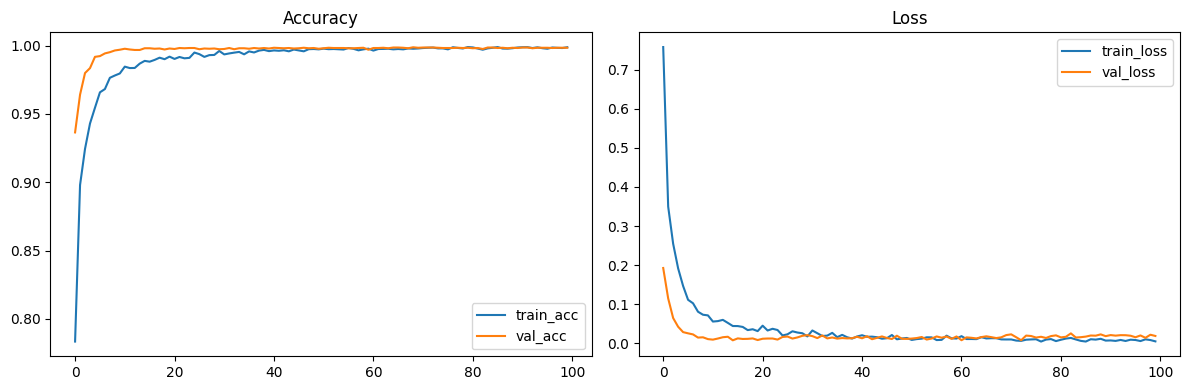

In [23]:

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc, label="train_acc")
axs[0].plot(val_acc, label="val_acc")
axs[0].set_title("Accuracy")
axs[0].legend()

axs[1].plot(train_loss, label="train_loss")
axs[1].plot(val_loss, label="val_loss")
axs[1].set_title("Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [24]:
# from tensorflow.keras.models import load_model
# model_high_accuracy_resnet = load_model("/kaggle/input/weight-cnn301/modes/resnet_model_highest_accuracy.keras",compile=False)
# model_low_loss_resnet = load_model("/kaggle/input/weight-cnn301/modes/resnet_model_lowest_loss.keras",compile= False)

In [25]:
# Đánh giá mô hình
eval = model_resnet.evaluate(test_dataset)
print(eval)

175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.9990 - loss: 0.0165
[0.018707888200879097, 0.9983841776847839]


# Model VGG16

In [26]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/vgg16_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/vgg16_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Checkpoint lưu mô hình qua từng epoch
checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
    filepath="{checkpoint_dir}/vgg16_model_epoch_{epoch:02d}.keras",
    save_freq="epoch",
    verbose=1
)

In [27]:
from tensorflow.keras.applications import VGG16

# weights_path_vgg = '/kaggle/input/vgg16-trained-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# Khởi tạo mô hình VGG16
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


# Đóng băng các layer
for layer in base_model_vgg.layers:
    layer.trainable = False
# định nghĩa adam với learning rate = 0.0001
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model_vgg = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(512, activation='relu'),  
    Dropout(0.3),                 
    Dense(256, activation='relu'),  
    Dropout(0.2),                   
    Dense(128, activation='relu'), 
    Dropout(0.2), 
    Dense(len(class_names), activation='softmax')
])

# Compile mô hình
model_vgg.compile(optimizer= optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:

# Huấn luyện mô hình
start_time = time.time()
history_vgg = model_vgg.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[checkpoint_high_acc, checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện VGG16:", end_time - start_time, "giây")

Epoch 1/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5731 - loss: 1.3504
Epoch 1: val_accuracy improved from -inf to 0.83788, saving model to /kaggle/working/modes/vgg16_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 0.53168, saving model to /kaggle/working/modes/vgg16_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 129s 229ms/step - accuracy: 0.5733 - loss: 1.3498 - val_accuracy: 0.8379 - val_loss: 0.5317
Epoch 2/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.8065 - loss: 0.6178
Epoch 2: val_accuracy improved from 0.83788 to 0.90144, saving model to /kaggle/working/modes/vgg16_model_highest_accuracy.keras

Epoch 2: val_loss improved from 0.53168 to 0.33713, saving model to /kaggle/working/modes/vgg16_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 106s 220ms/step - accuracy: 0.8065 - loss: 0.6177 - val_accuracy: 0.9014 - val_loss: 0.3371
Epoch 3/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8616 - loss: 0.435

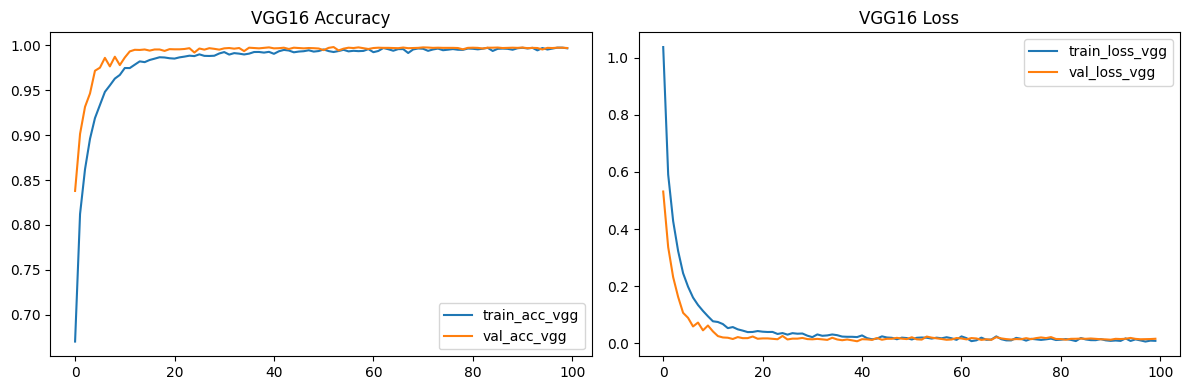

In [29]:

# Vẽ đồ thị
train_acc_vgg = history_vgg.history["accuracy"]
val_acc_vgg = history_vgg.history["val_accuracy"]
train_loss_vgg = history_vgg.history["loss"]
val_loss_vgg = history_vgg.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_vgg, label="train_acc_vgg")
axs[0].plot(val_acc_vgg, label="val_acc_vgg")
axs[0].set_title("VGG16 Accuracy")
axs[0].legend()

axs[1].plot(train_loss_vgg, label="train_loss_vgg")
axs[1].plot(val_loss_vgg, label="val_loss_vgg")
axs[1].set_title("VGG16 Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [30]:
# from tensorflow.keras.models import load_model
# model_high_accuracy_vgg = load_model("/kaggle/input/weight-cnn301/modes/vgg16_model_highest_accuracy.keras")
# model_low_loss_vgg = load_model("/kaggle/input/weight-cnn301/modes/vgg16_model_lowest_loss.keras")

In [31]:
# Đánh giá mô hình
eval = model_vgg.evaluate(test_dataset)
print(eval)

175/175 ━━━━━━━━━━━━━━━━━━━━ 29s 165ms/step - accuracy: 0.9980 - loss: 0.0125
[0.016468092799186707, 0.9971274733543396]


# Model Mobilenet

In [32]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/mobilenet_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/mobilenet_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Checkpoint lưu mô hình qua từng epoch
checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
    filepath="{checkpoint_dir}/mobilenet_model_epoch_{epoch:02d}.keras",
    save_freq="epoch",
    verbose=1
)

In [33]:
from tensorflow.keras.applications import MobileNet
# weights_path_mb = '/kaggle/input/mobilenet-trained-weights/mobilenet_1_0_224_tf_no_top.h5'
# Khởi tạo mô hình MobileNet
base_model_mobilenet = MobileNet(weights = 'imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Đóng băng các layer
for layer in base_model_mobilenet.layers:
    layer.trainable = False
# định nghĩa adam với learning rate = 0.0001
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model_mobilenet = Sequential([
    base_model_mobilenet,
    Flatten(),
    Dense(512, activation='relu'),  
    Dropout(0.3),                  
    Dense(256, activation='relu'), 
    Dropout(0.2),                  
    Dense(128, activation='relu'), 
    Dropout(0.2),   
    Dense(len(class_names), activation='softmax')
])

# Compile mô hình
model_mobilenet.compile(optimizer= optimizer,
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])



17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
# Huấn luyện mô hình
start_time = time.time()
history_mobilenet = model_mobilenet.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[checkpoint_high_acc,checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện MobileNet:", end_time - start_time, "giây")



Epoch 1/100
482/483 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6637 - loss: 1.1609
Epoch 1: val_accuracy improved from -inf to 0.94488, saving model to /kaggle/working/modes/mobilenet_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 0.18083, saving model to /kaggle/working/modes/mobilenet_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 45s 70ms/step - accuracy: 0.6641 - loss: 1.1593 - val_accuracy: 0.9449 - val_loss: 0.1808
Epoch 2/100
482/483 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8968 - loss: 0.3230
Epoch 2: val_accuracy improved from 0.94488 to 0.97056, saving model to /kaggle/working/modes/mobilenet_model_highest_accuracy.keras

Epoch 2: val_loss improved from 0.18083 to 0.09512, saving model to /kaggle/working/modes/mobilenet_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8968 - loss: 0.3230 - val_accuracy: 0.9706 - val_loss: 0.0951
Epoch 3/100
482/483 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9293 - lo

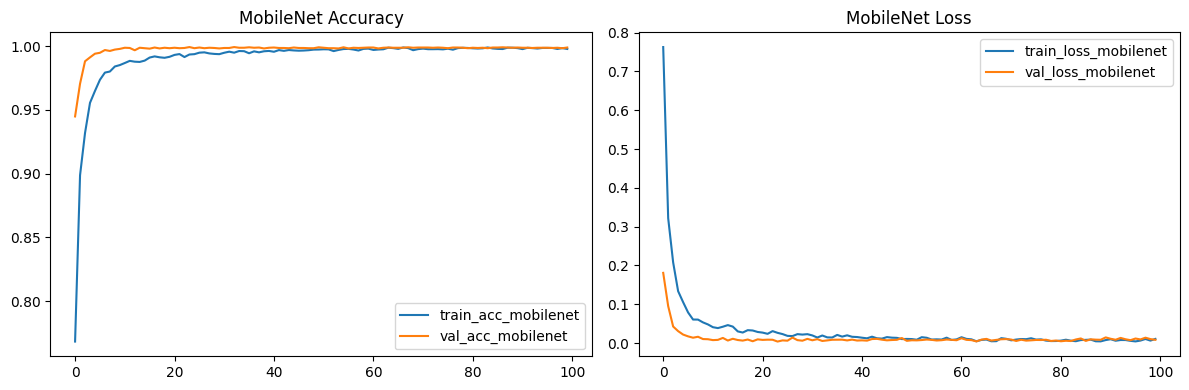

In [35]:
# Vẽ đồ thị
train_acc_mobilenet = history_mobilenet.history["accuracy"]
val_acc_mobilenet = history_mobilenet.history["val_accuracy"]
train_loss_mobilenet = history_mobilenet.history["loss"]
val_loss_mobilenet = history_mobilenet.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_mobilenet, label="train_acc_mobilenet")
axs[0].plot(val_acc_mobilenet, label="val_acc_mobilenet")
axs[0].set_title("MobileNet Accuracy")
axs[0].legend()

axs[1].plot(train_loss_mobilenet, label="train_loss_mobilenet")
axs[1].plot(val_loss_mobilenet, label="val_loss_mobilenet")
axs[1].set_title("MobileNet Loss")
axs[1].legend()

plt.tight_layout()
plt.show()


In [36]:
# Đánh giá mô hình
eval = model_mobilenet.evaluate(test_dataset)
print(eval)

175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9997 - loss: 0.0027
[0.008268597535789013, 0.9989228248596191]


# Model Alexnet

In [37]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/alexnet_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/alexnet_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Checkpoint lưu mô hình qua từng epoch
checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
    filepath="{checkpoint_dir}/alexnet_model_epoch_{epoch:02d}.keras",
    save_freq="epoch",
    verbose=1
)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# định nghĩa adam với learning rate = 0.0001
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

# Tạo mô hình AlexNet
model_alexnet = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, kernel_size=(5, 5), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile mô hình
model_alexnet.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])




In [39]:
# Huấn luyện mô hình
start_time = time.time()
history_alexnet = model_alexnet.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[checkpoint_high_acc,checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện AlexNet:", end_time - start_time, "giây")

Epoch 1/100
482/483 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3946 - loss: 1.9042
Epoch 1: val_accuracy improved from -inf to 0.59425, saving model to /kaggle/working/modes/alexnet_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 1.17254, saving model to /kaggle/working/modes/alexnet_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 49s 84ms/step - accuracy: 0.3950 - loss: 1.9029 - val_accuracy: 0.5943 - val_loss: 1.1725
Epoch 2/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6145 - loss: 1.1564
Epoch 2: val_accuracy improved from 0.59425 to 0.70126, saving model to /kaggle/working/modes/alexnet_model_highest_accuracy.keras

Epoch 2: val_loss improved from 1.17254 to 0.91324, saving model to /kaggle/working/modes/alexnet_model_lowest_loss.keras
483/483 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.6145 - loss: 1.1564 - val_accuracy: 0.7013 - val_loss: 0.9132
Epoch 3/100
482/483 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6839 - loss: 0.94

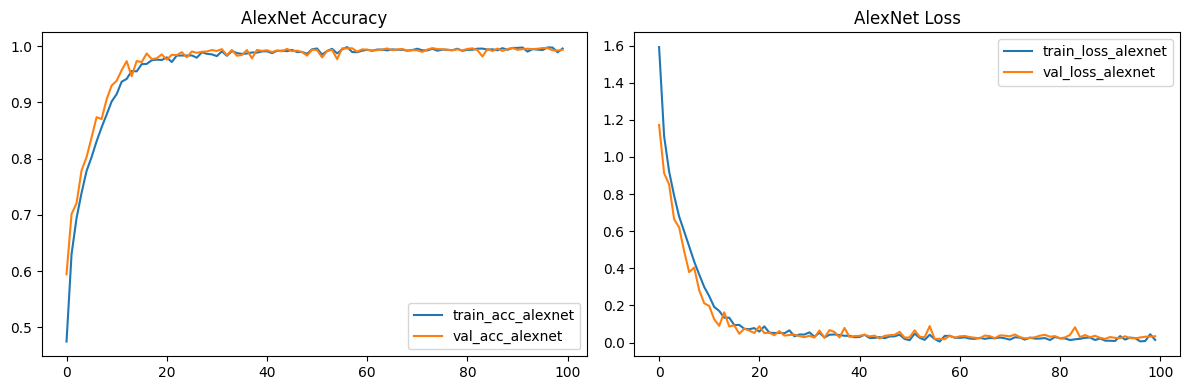

In [40]:
# Vẽ đồ thị
train_acc_alexnet = history_alexnet.history["accuracy"]
val_acc_alexnet = history_alexnet.history["val_accuracy"]
train_loss_alexnet = history_alexnet.history["loss"]
val_loss_alexnet = history_alexnet.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_alexnet, label="train_acc_alexnet")
axs[0].plot(val_acc_alexnet, label="val_acc_alexnet")
axs[0].set_title("AlexNet Accuracy")
axs[0].legend()

axs[1].plot(train_loss_alexnet, label="train_loss_alexnet")
axs[1].plot(val_loss_alexnet, label="val_loss_alexnet")
axs[1].set_title("AlexNet Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [41]:
# from tensorflow.keras.models import load_model
# model_high_accuracy_alexnet = load_model("/kaggle/input/weight-cnn301/modes/alexnet_model_highest_accuracy.keras")
# model_low_loss_alexnet = load_model("/kaggle/input/weight-cnn301/modes/alexnet_model_lowest_loss.keras")

In [42]:
# # Đánh giá mô hình
# eval = model_high_accuracy_alexnet.evaluate(test_dataset)
# print(eval)

In [43]:
# # Đánh giá mô hình
# eval = model_low_loss_alexnet .evaluate(test_dataset)
# print(eval)

In [44]:
# Đánh giá mô hình
eval = model_alexnet.evaluate(test_dataset)
print(eval)

175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9951 - loss: 0.0295
[0.033830683678388596, 0.9935368299484253]
